# IBM Attrition Prediction
Yeison Lopez Ibarra

# Import Libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("ibm.csv")
df.head()
print('The shape of our features is:', df.shape)

The shape of our features is: (1470, 13)


# Exploratory data analysis

In [3]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [4]:
# Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
# Find the age distribution of employees in IBM
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

The age is in the 18 - 60 range. with mean of around 37 year. And 75% of the employees with ages below the 43 years.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

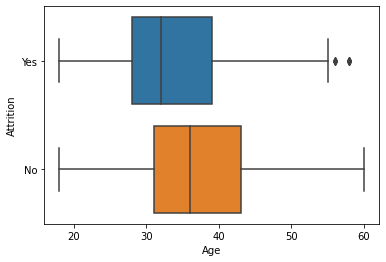

In [6]:
# Explore attrition by age
sns.boxplot(x=df.Age, y=df.Attrition)

In [7]:
# Explore data for Left employees
df.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

<AxesSubplot:>

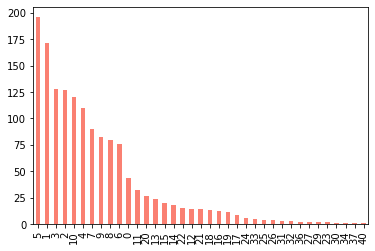

In [8]:
df.YearsAtCompany.value_counts().plot(kind="bar", color=["salmon"])

The majority of the sampled individuals worked less than 10 years, with 75% of the sample in the range of 0-9 years.

In [9]:
# Find out the distribution of employees by the education field
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:>

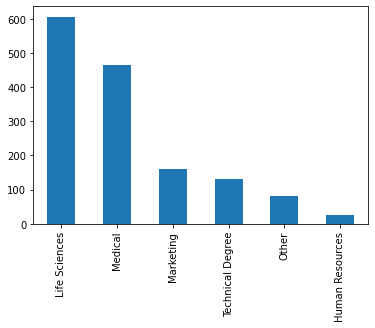

In [10]:
df.EducationField.value_counts().plot(kind="bar")

The majority of employees is in the 'Life Sciences' field.

In [11]:
df.EducationField.describe()

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

<AxesSubplot:>

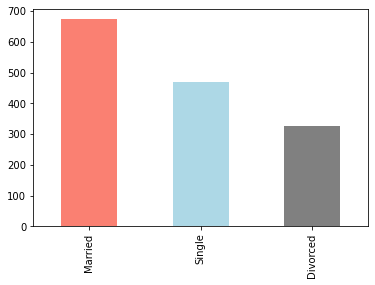

In [12]:
# Give a bar chart for the number of married and unmarried employees
df.MaritalStatus.value_counts().plot(kind="bar", color=["salmon", "lightblue", "gray"])

# Logistic Regression Model

In [13]:
# Define data frames for features and target
target_label = df['Attrition']


# encode categorical features
try:
    df.replace({'Attrition': {'No': 0, 'Yes': 1}}, inplace = True)
    df.replace({'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}}, inplace = True)
    df.replace({'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}}, inplace = True)
    df.replace({'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}}, inplace = True)
except TypeError:
    print('All string values already converted to integers.')
    
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,0,1,2,0,2,4,0,5993,8,1,6
1,49,0,1,8,1,0,3,2,1,5130,1,3,10
2,37,1,1,2,2,1,4,3,0,2090,6,3,0
3,33,0,1,3,4,0,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [14]:
# Define the training model. Using logistic regression
logistic_reg = linear_model.LogisticRegression()

main_features = df.drop(columns='Attrition')

# Labels are the values we want to predict
labels = np.array(df['Attrition'])

# Saving feature names for later use
feature_list = list(main_features.columns)

# Convert to numpy array
features_arr = np.array(main_features)

In [15]:
# Split the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(features_arr, labels, test_size=0.25, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Train a logistic regression model on the training set
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
#predicting the test dataset through Logistic Regression classifier
pred_log = logistic_reg.predict(X_test)

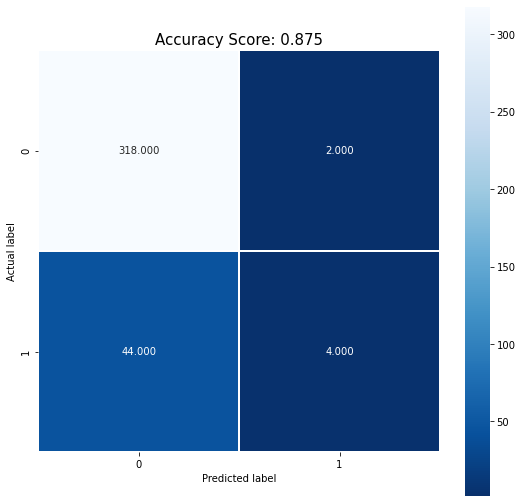

In [18]:
#confusion matrix for logistic regression
cm = confusion_matrix(y_test, pred_log)

# score
log_score = accuracy_score(y_test, pred_log)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_score)
plt.title(all_sample_title, size = 15);

In [19]:
test_score = accuracy_score(y_test, logistic_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, logistic_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.029038,87.5


# Random Forest Model

In [20]:
# Let's try with Random Forest
clf_rand = ensemble.RandomForestClassifier()
clf_rand.fit(X_train, y_train)
pred_rand = clf_rand.predict(X_test)

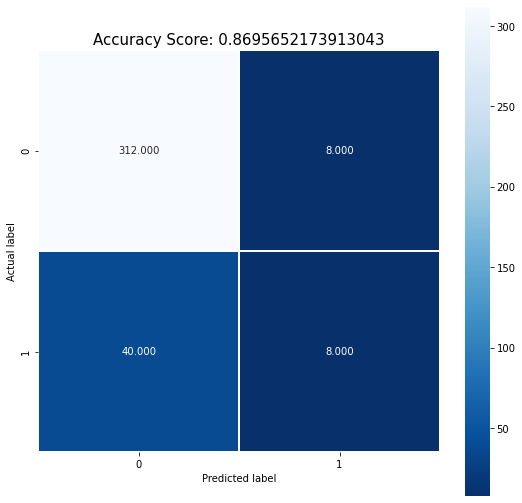

In [21]:
from sklearn import metrics
cm = confusion_matrix(y_test, pred_rand)
score = accuracy_score(y_test, pred_rand)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [22]:
test_score = accuracy_score(y_test, clf_rand.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf_rand.predict(X_train)) * 100

results_df1 = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df1

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest,100.0,86.956522


In [23]:
pred_n_list = pred_rand.tolist()
#pred_n_list


In [24]:
# True vs predicted responses
true_vs_predicted = np.concatenate((pred_log.reshape(len(pred_log),1), y_test.reshape(len(y_test),1)),1)
# Print the first 10 true vs predicted responses
print(true_vs_predicted[0:10])

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [25]:
# Test with 3 employees
new_df = pd.read_csv("newTestSet.csv")
new_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0


In [26]:
new_features = new_df.drop(columns='Attrition')

In [27]:
new_features.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0


In [28]:
try:
    new_features.replace({'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}}, inplace = True)
    new_features.replace({'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}}, inplace = True)
    new_features.replace({'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}}, inplace = True)
except TypeError:
    print('All string values already converted to integers.')
new_features.head()    

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,0,1,2,0,2,4,0,5993,8,1,6
1,49,1,8,1,0,3,2,1,5130,1,3,10
2,37,1,2,2,1,4,3,0,2090,6,3,0


In [29]:
# Convert to numpy array
features_to_predict = np.array(new_features)

In [30]:
# Use random forest to predict our new input
pred_rand = clf_rand.predict(features_to_predict)
pred_rand

array([0, 0, 0])

In [31]:

pred_rand = np.where(pred_rand == 0, 'no', pred_rand) 
pred_rand = np.where(pred_rand == '1', 'yes', pred_rand) 

print(pred_rand)

['no' 'no' 'no']


In [32]:
new_pred_log = logistic_reg.predict(features_to_predict)
new_pred_log = np.where(new_pred_log == 0, 'no', new_pred_log) 
new_pred_log = np.where(new_pred_log == '1', 'yes', new_pred_log) 
print(new_pred_log)

['no' 'no' 'no']


In [33]:
# Let's try with Support Vector Machines
from sklearn import svm
clf_svm = svm.SVC(gamma=0.001, C=100.)

In [34]:
# Train the model
clf_svm.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001)

In [35]:
# Prediction and score
svm_predict = clf_svm.predict(X_test)
accuracy_score(y_test, svm_predict)

0.8695652173913043

In [36]:
# Try with the 3 employees data
new_pred_svm = clf_svm.predict(features_to_predict)
new_pred_svm = np.where(new_pred_svm == 0, 'no', new_pred_svm) 
new_pred_svm = np.where(new_pred_svm == '1', 'yes', new_pred_svm) 
new_pred_svm

array(['yes', 'yes', 'yes'], dtype='<U21')

In [37]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=100)
rf_exp.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=100)

In [38]:
predictions = rf_exp.predict(X_test)

In [39]:
# Performance metrics
errors = abs(predictions - y_test)

In [40]:
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.24 degrees.


/Users/yeisonlopez/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/yeisonlopez/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [41]:
pred_RFR = rf_exp.predict(features_to_predict)
pred_RFR

array([0.706, 0.683, 0.441])